In [1]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm

%matplotlib inline

/Users/ivan/Documents/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ivan/Documents/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ivan/Documents/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ivan/Docu

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

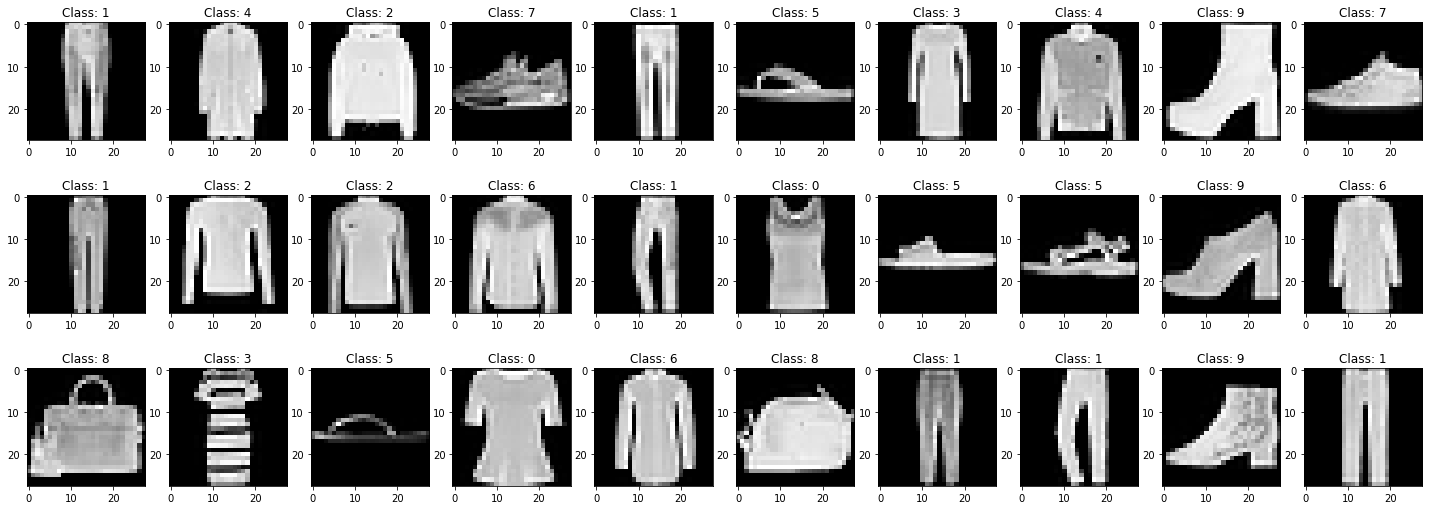

In [3]:
plt.figure(figsize=(25, 9))

for i in range(1000, 1030, 1):
    plt.subplot(3, 10, i % 30 + 1)
    plt.title(f'Class: {y_train[i]}')
    plt.imshow(x_train[i], cmap='gray')

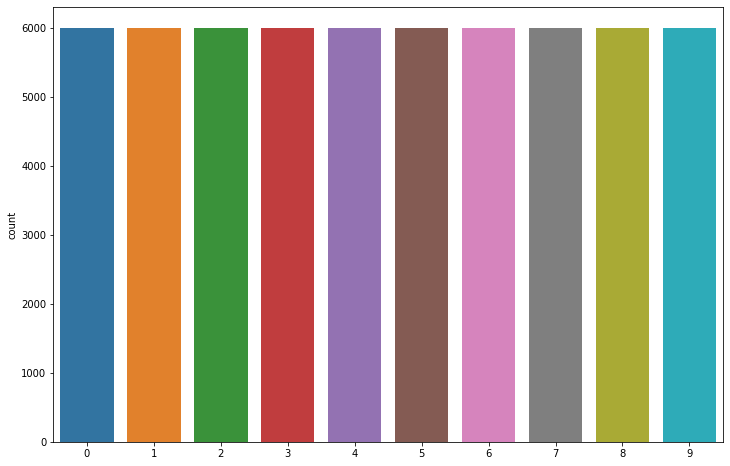

In [4]:
plt.figure(figsize=(12, 8))
sns.countplot(y_train)
plt.show()

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255
x_test = x_test.reshape(x_test.shape[0], -1) / 255

In [7]:
x_train_ph = tf.placeholder(x_train.dtype, shape=x_train.shape)
y_train_ph = tf.placeholder(y_train.dtype, shape=y_train.shape)
x_test_single_ph = tf.placeholder(x_test.dtype, shape=x_test.shape[1:])

dist = tf.negative(tf.pow(tf.reduce_sum(tf.pow(tf.subtract(x_train_ph, x_test_single_ph), 2), axis=1), 0.5))

k = 3

values, indices = tf.nn.top_k(dist, k=k, sorted=True)

nn_classes = tf.stack([y_train_ph[indices[i]] for i in range(k)])

classes, idx, count = tf.unique_with_counts(nn_classes)

prediction = tf.slice(classes, begin=[tf.argmax(count, 0)], size=tf.constant([1], dtype=tf.int64))[0]

correct_predictions = 0

init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [8]:
with tf.Session() as sess:
    sess.run(init)
    for i in tqdm(range(x_test.shape[0])):
        class_prediction = sess.run(prediction,
                                    feed_dict={
                                        x_train_ph: x_train,
                                        y_train_ph: y_train,
                                        x_test_single_ph: x_test[i]
                                    })
        if class_prediction == y_test[i]:
            correct_predictions += 1
    print(f'K = {k}, accuracy: {correct_predictions / len(y_test)}')

 49%|████▊     | 4873/10000 [23:49<25:52,  3.30it/s]  

KeyboardInterrupt: 